In [64]:
import ast
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

arg = "0020"
end = 33.75


file_name = f"merge_data/merge_data_{arg}.txt"

# ###### funktioniert für 0001....0011 #########

def clean_data(data):
    # Filter out invalid entries
    data = ast.literal_eval(data)

    cleaned_data = []
    for row in data:
        try:
            value = int(row[1][0].strip())
            cleaned_data.append([row[0], value])
        except ValueError:
            # Skip rows with invalid integer conversion
            continue

    adjusted_data = [[(sublist[0] - end)*(-1), sublist[1]] for sublist in cleaned_data]

    return adjusted_data



##################################################
# new type of data from stage with [[31.75, ['50', '52', '12.00', '0']], [33.75, ['57', '52', '11.00', '0']]] format
#### from 0012 on

with open(file_name, "r") as f:
    data = f.read()


def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    converted_data = []
    for outer in data:
        temp = [outer[0]]  # Keep the first element as it is (already a float)
        temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
        converted_data.append(temp)

    # check for invalid entries
    valid_data = []
    invalid_entries = []
    for i, entry in enumerate(converted_data):
        if len(entry) == 5:
            # Check if all elements can be converted to float
            try:
                temp = [float(entry[0])] + [float(x) for x in entry[1:]]
                valid_data.append(temp)
            except ValueError:
                invalid_entries.append(i)
        else:
            invalid_entries.append(i)
            
    return valid_data

valid_data = clean_data_new(data)

serial_data_all = list(map(list, zip(*valid_data)))

stage_data = serial_data_all[0]
PS_data = serial_data_all[1]
PS_data_avg = serial_data_all[2]
PS_data_dev = serial_data_all[3]
LASER_indicator = serial_data_all[4]

#print(stage_data)




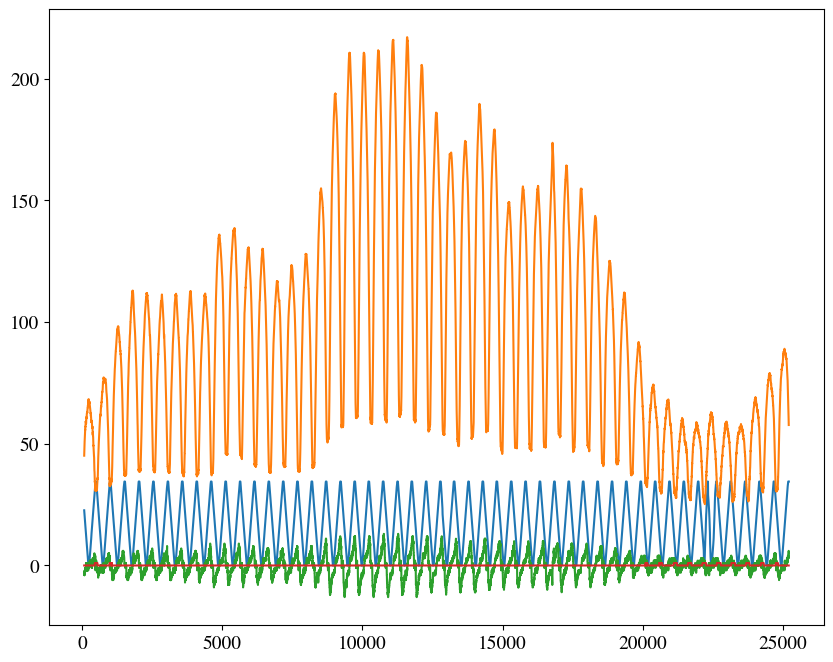

In [65]:
######## from 0012 on ##########

fig, ax = plt.subplots(figsize=(10,8))
end = len(stage_data)
x = [i for i in range(end)]

plt.plot(x[70:end], stage_data[70:end])
plt.plot(x[70:end], serial_data_all[2][70:end])
plt.plot(x[70:end], serial_data_all[3][70:end])
plt.plot(x[70:end], serial_data_all[4][70:end])




In [66]:
# find local maxima and minima
from scipy.signal import find_peaks
import numpy as np

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=100)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=100)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

x_min, x_max, y_min, y_max = find_min_max_y(PS_data_avg)


Text(0.5, 0, 'Data points')

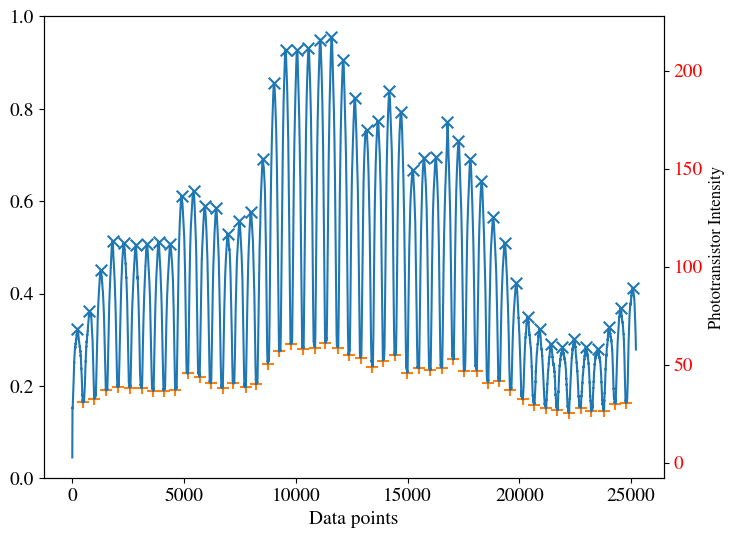

In [67]:
# Plot with stage and sensor data

x = [i for i in range (0, len(PS_data_avg))]

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1.plot([i for i in range (0, len(serial_data))], stage_data, color="blue")
# ax1.set_ylabel(r"Distance to skin $[mm]$", fontsize=12, color="blue")
# for label in ax1.get_yticklabels():
#     label.set_color("blue")

ax2 = ax1.twinx()
ax2.scatter(x_max, y_max, marker = 'x', zorder = 2, s=70)
ax2.scatter(x_min, y_min, marker = '+', zorder = 2, s=70)
ax2.plot(x, serial_data_all[2])
#ax2.plot(x, serial_data, color="lightgrey", zorder =1)

ax2.set_ylabel("Phototransistor Intensity", fontsize=12)
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel(r"Data points")


In [68]:
# Read-in difference tape/no tape
freq= 200             # 200ms -> 5Hz

arg_nt_w = "0003"
arg_nt_lb = "0005"
arg_nt_db = "0004"
arg_t_w = "0019"
arg_t_lb = "0020"
arg_t_db = "0016"

file_name_nt_w = f"merge_data/merge_data_{arg_nt_w}.txt"
file_name_nt_lb = f"merge_data/merge_data_{arg_nt_lb}.txt"
file_name_nt_db = f"merge_data/merge_data_{arg_nt_db}.txt"
file_name_t_w = f"merge_data/merge_data_{arg_t_w}.txt"
file_name_t_lb = f"merge_data/merge_data_{arg_t_lb}.txt"
file_name_t_db = f"merge_data/merge_data_{arg_t_db}.txt"

# Open the data 
with open(file_name_nt_w, "r") as f:
    data_nt_w = f.read()

with open(file_name_nt_lb, "r") as f:
    data_nt_lb = f.read()

with open(file_name_nt_db, "r") as f:
    data_nt_db = f.read()

with open(file_name_t_w, "r") as f:
    data_t_w = f.read()

with open(file_name_t_lb, "r") as f:
    data_t_lb = f.read()

with open(file_name_t_db, "r") as f:
    data_t_db = f.read()

# Remove empty points ('')
# for all data below 0012 use clean_data, above clean_data_new
data_nt_w = clean_data(data_nt_w)
data_nt_lb = clean_data(data_nt_lb)
data_nt_db = clean_data(data_nt_db)
data_t_w = clean_data_new(data_t_w)
data_t_lb = clean_data_new(data_t_lb)
data_t_db = clean_data_new(data_t_db)

print(data_t_w)
# Extract stage and serial data
# data[:,0]
serial_data_nt_w = [sublist[1] for sublist in data_nt_w]
serial_data_nt_lb = [sublist[1] for sublist in data_nt_lb]
serial_data_nt_db = [sublist[1] for sublist in data_nt_db]
serial_data_t_w = [sublist[1] for sublist in data_t_w]
serial_data_t_lb = [sublist[1] for sublist in data_t_lb]
serial_data_t_db = [sublist[1] for sublist in data_t_db]

print(serial_data_t_w)


# Find min/max and the y-values
x_min_nt_w, x_max_nt_w, y_min_nt_w, y_max_nt_w = find_min_max_y(serial_data_nt_w)
x_min_nt_lb, x_max_nt_lb, y_min_nt_lb, y_max_nt_lb = find_min_max_y(serial_data_nt_lb)
x_min_nt_db, x_max_nt_db, y_min_nt_db, y_max_nt_db = find_min_max_y(serial_data_nt_db)
x_min_t_w, x_max_t_w, y_min_t_w, y_max_t_w = find_min_max_y(serial_data_t_w)
x_min_t_lb, x_max_t_lb, y_min_t_lb, y_max_t_lb = find_min_max_y(serial_data_t_lb)
x_min_t_db, x_max_t_db, y_min_t_db, y_max_t_db = find_min_max_y(serial_data_t_db)



[[33.99750990160839, 30.0, 3.0, -3.0, 1.0], [32.67749725319412, 35.0, 6.5, -6.0, 0.0], [32.509822395480036, 31.0, 9.6, -9.0, 0.0], [32.38955026764785, 32.0, 12.8, -12.0, 0.0], [32.222049046306964, 32.0, 16.0, -16.0, 0.0], [32.05379540068224, 29.0, 18.9, -18.0, 0.0], [31.93407312136516, 32.0, 22.1, -22.0, 0.0], [31.766195687882355, 30.0, 25.1, -25.0, 0.0], [31.645923560050164, 29.0, 28.0, -28.0, 0.0], [31.47807506596289, 31.0, 31.1, -28.0, 0.0], [31.310921117368395, 30.0, 31.1, -25.0, 0.0], [31.191140959260252, 28.0, 30.4, -21.0, 0.0], [31.02256898028467, 29.0, 30.2, -18.0, 0.0], [30.85474942559293, 29.0, 29.9, -13.0, 0.0], [30.735113964462453, 31.0, 29.8, -11.0, 0.0], [30.567352288561775, 33.0, 30.2, -8.0, 0.0], [30.447051221334053, 31.0, 30.1, -5.0, 0.0], [30.279029090873586, 31.0, 30.2, -2.0, 0.0], [30.11138317255504, 30.0, 30.3, 1.0, 0.0], [29.992181802357543, 35.0, 30.7, 1.0, 0.0], [29.823754520359625, 34.0, 31.1, -1.0, 0.0], [29.65628223841427, 33.0, 31.6, -1.0, 0.0], [29.53612586

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

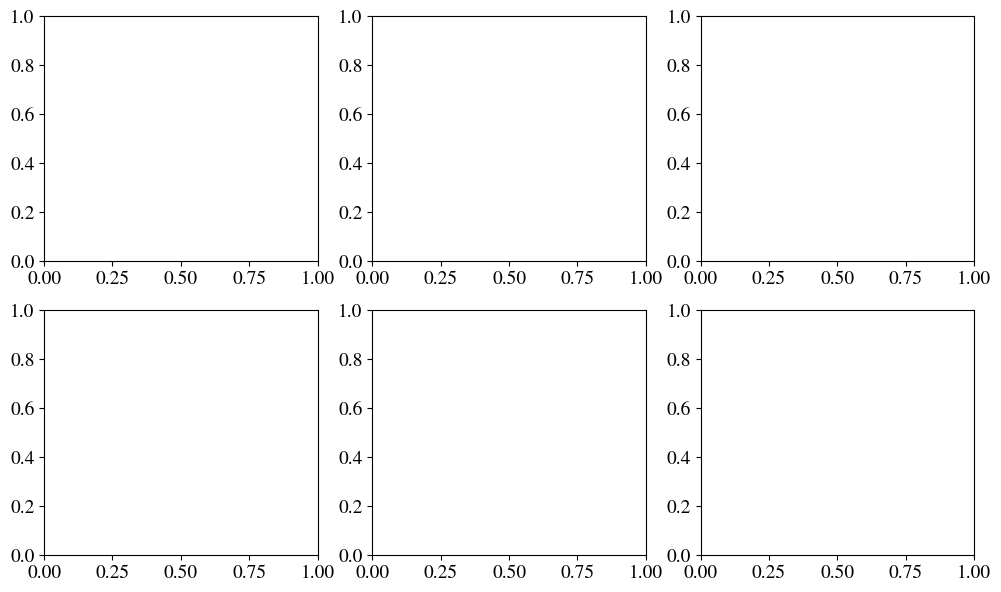

In [72]:
# Plot difference tape/no tape 
import seaborn as sns

fig, ax = plt.subplots(2,3, figsize=(12,7))
size = 60

# ax[0,0].plot([i for i in range (0, len(serial_data_nt_w))], serial_data_nt_w)
ax[0].scatter([i for i in range(len(y_max_nt_w))], y_max_nt_w, marker = '.', zorder = 2, s=size)
ax[0].scatter([i for i in range(len(y_min_nt_w))], y_min_nt_w, marker = '+', zorder = 2, s=size)
# ax[0,1].plot([i for i in range (0, len(serial_data_nt_lb))], serial_data_nt_lb)
ax[1].scatter([i for i in range(len(y_max_nt_lb))], y_max_nt_lb, marker = '.', zorder = 2, s=size)
ax[1].scatter([i for i in range(len(y_min_nt_lb))], y_min_nt_lb, marker = '+', zorder = 2, s=size)
# ax[0,2].plot([i for i in range (0, len(serial_data_nt_db))], serial_data_nt_db)
ax[0,2].scatter([i for i in range(len(y_max_nt_db))], y_max_nt_db, marker = '.', zorder = 2, s=size, label = "maximum")
ax[0,2].scatter([i for i in range(len(y_min_nt_db))], y_min_nt_db, marker = '+', zorder = 2, s=size, label = "minimum")
# ax[1,0].plot([i for i in range (0, len(serial_data_t_w))], serial_data_t_w)
ax[1,0].scatter([i for i in range(len(y_max_t_w))], y_max_t_w, marker = '.', zorder = 2, s=size)
ax[1,0].scatter([i for i in range(len(y_min_t_w))], y_min_t_w, marker = '+', zorder = 2, s=size)
# ax[1,1].plot([i for i in range (0, len(serial_data_t_lb))], serial_data_t_lb)
ax[1,1].scatter([i for i in range(len(y_max_t_lb))], y_max_t_lb, marker = '.', zorder = 2, s=size)
ax[1,1].scatter([i for i in range(len(y_min_t_lb))], y_min_t_lb, marker = '+', zorder = 2, s=size)
# ax[1,2].plot([i for i in range (0, len(serial_data_t_db))], serial_data_t_db)
ax[1,2].scatter([i for i in range(len(y_max_t_db))], y_max_t_db, marker = '.', zorder = 2, s=size)
ax[1,2].scatter([i for i in range(len(y_min_t_db))], y_min_t_db, marker = '+', zorder = 2, s=size)

# set labels
ax[0,0].set(ylabel='Intensity')
ax[1,0].set(xlabel='# of cycle', ylabel='Intensity')
ax[1,1].set(xlabel='# of cycle')
ax[1,2].set(xlabel='# of cycle')

# set titles
ax[0,0].set_title('white silicon')
ax[0,1].set_title('light brown silicon')
ax[0,2].set_title('dark brown silicon')
fig.text(0.04, 0.7, 'Without tape', va='center', ha='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=16)

ax[0,2].legend(loc="upper right")

ax[1,0].set_ylim([0,200])   
ax[1,1].set_ylim([0,200])   
ax[1,2].set_ylim([0,200]) 
ax[0,0].set_ylim([0,650])   
ax[0,1].set_ylim([0,650])   
ax[0,2].set_ylim([0,650])   

for axis in ax.flat:
  
    #axis.set_xlim([0,51])
    axis.set_xticks([0,10,20,30,40,50])
    sns.despine()

In [ ]:
# Linearer fit und standartabweichung 

import numpy as np
import pandas as pd


args = ['0015', '0016', '0017', '0018', '0019', '0020']
frames = []

def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    converted_data = []
    for outer in data:
        temp = [outer[0]]  # Keep the first element as it is (already a float)
        temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
        converted_data.append(temp)

    # check for invalid entries
    valid_data = []
    invalid_entries = []
    for i, entry in enumerate(converted_data):
        if len(entry) == 5:
            # Check if all elements can be converted to float
            try:
                temp = [float(entry[0])] + [float(x) for x in entry[1:]]
                valid_data.append(temp)
            except ValueError:
                invalid_entries.append(i)
        else:
            invalid_entries.append(i)
            
    return valid_data

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=100)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=100)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

for arg in range(len(args)):
    file_index = args[arg]

    file_name = f"merge_data/merge_data_{file_index}.txt"

    # Open the data 
    with open(file_name, "r") as f:
        data = f.read()

    # Remove empty points ('')
    data = clean_data_new(data)

    # transpose data
    data_transposed = list(map(list, zip(*data)))

    # Find min/max and the y-values (averages)
    x_min, x_max, y_min, y_max = find_min_max_y(data_transposed[2])

    min = { 'index': [i for i in range(len(y_min))],
            'x_min': x_min,
            'y_min': y_min}
    
    max = { 'index': [i for i in range(len(y_max))],
            'x_max': x_max,
            'y_max': y_max}

    sensor_data = {'stage': data_transposed[0],
                       'raw': data_transposed[1],
                       'avg': data_transposed[2],
                       'dev': data_transposed[3],
                       'led': data_transposed[4]}

    pd_data = pd.DataFrame(data=sensor_data)
    pd_min = pd.DataFrame(data=min)
    pd_max = pd.DataFrame(data=max)

    frames.append([file_index, pd_data, pd_min, pd_max])


(0.0, 650.0)

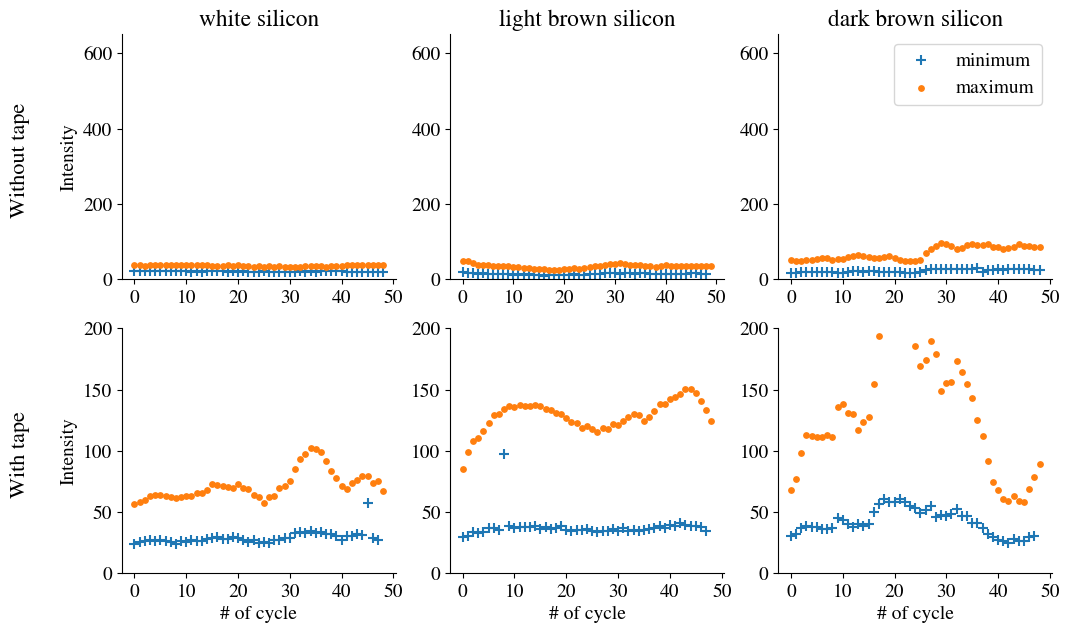

In [114]:
# Plot difference tape/no tape 
import seaborn as sns

fig, axs = plt.subplots(2,3, figsize=(12,7))
size = 60

for i, ax in enumerate(axs.flatten()):
    # frames = [file_index, pd_data, pd_min, pd_max]
    if i==2 :
        ax.scatter(list(frames[i][2].index), list(frames[i][2].y_min), marker = '+', zorder = 2, s=size, label = "minimum")
        ax.scatter(list(frames[i][3].index), list(frames[i][3].y_max), marker = '.', zorder = 2, s=size, label = "maximum")
    else:     
        ax.scatter(list(frames[i][2].index), list(frames[i][2].y_min), marker = '+', zorder = 2, s=size)
        ax.scatter(list(frames[i][3].index), list(frames[i][3].y_max), marker = '.', zorder = 2, s=size)

    ax.set_xticks([0,10,20,30,40,50])
    sns.despine()

# # set labels
axs[0,0].set(ylabel='Intensity')
axs[1,0].set(xlabel='# of cycle', ylabel='Intensity')
axs[1,1].set(xlabel='# of cycle')
axs[1,2].set(xlabel='# of cycle')

# # set titles
axs[0,0].set_title('white silicon')
axs[0,1].set_title('light brown silicon')
axs[0,2].set_title('dark brown silicon')
fig.text(0.04, 0.7, 'Without tape', va='center', ha='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=16)

axs[0,2].legend(loc="upper right")

axs[1,0].set_ylim([0,200])   
axs[1,1].set_ylim([0,200])   
axs[1,2].set_ylim([0,200]) 
axs[0,0].set_ylim([0,650])   
axs[0,1].set_ylim([0,650])   
axs[0,2].set_ylim([0,650])   
